# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

# import mnist
from tensorflow.keras.datasets import mnist

# Dataset Overview

In [3]:
# read and splot data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 3s 0us/step


In [4]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [9]:
# glimpse data
glimpse1 = x_train[123]
glimpse2 = x_train[741]
glimpse3 = x_train[425]
glimpse4 = x_train[523]

glimpse1.shape, glimpse2.shape

((28, 28), (28, 28))

Text(0.5, 1.0, 'glimpse4')

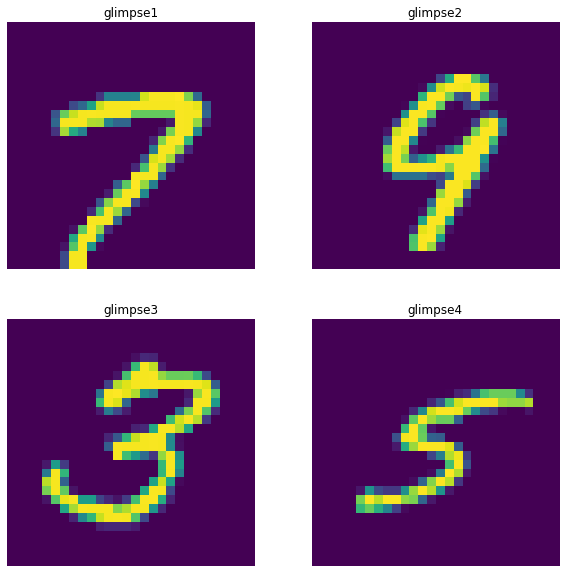

In [10]:
rows = 2
columns = 2
fig = plt.figure(figsize=(10, 10))

# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
  
# showing image
plt.imshow(glimpse1)
plt.axis('off')
plt.title("glimpse1")

# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
  
# showing image
plt.imshow(glimpse2)
plt.axis('off')
plt.title("glimpse2")

# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)
  
# showing image
plt.imshow(glimpse3)
plt.axis('off')
plt.title("glimpse3")

# Adds a subplot at the 4st position
fig.add_subplot(rows, columns, 4)
  
# showing image
plt.imshow(glimpse4)
plt.axis('off')
plt.title("glimpse4")

# PreProcessing Data

## Target Data

In [11]:
# We need to translate this to be "one hot encoded" so our CNN can understand
# check y_train
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [14]:
y_cat_test = to_categorical(y_test,10)
y_cat_train = to_categorical(y_train,10)

## Normalize Predictor Data

In [18]:
print(glimpse4.max())
print(glimpse4.min())

255
0


In [19]:
x_train = x_train/255
x_test = x_test/255

## Reshaping the Data

In [20]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [21]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000,28,28,1)

x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

# Modeling

## Build Model

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [23]:
model = Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',))

# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 128 NEURONS IN DENSE HIDDEN LAYER 
model.add(Dense(128, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))

# Loss Function
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

2022-08-25 18:38:46.671216: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
__________________________________________________

In [25]:
# assign callback
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)

## Model Training

In [35]:
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0152 - accuracy: 0.9954 - val_loss: 0.0399 - val_accuracy: 0.9868
Epoch 2/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0111 - accuracy: 0.9962 - val_loss: 0.0479 - val_accuracy: 0.9866
Epoch 3/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0080 - accuracy: 0.9976 - val_loss: 0.0516 - val_accuracy: 0.9859


## Evaluation

In [37]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:title={'center':'Accuracy vs Validation Accuracy'}>

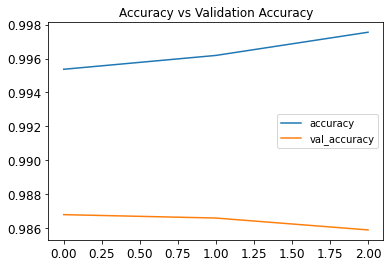

In [39]:
losses[['accuracy','val_accuracy']].plot(title='Accuracy vs Validation Accuracy', fontsize=12)

<AxesSubplot:title={'center':'Loss vs Validation Loss'}>

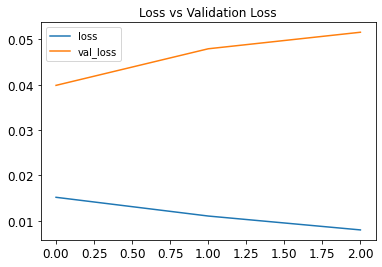

In [40]:
losses[['loss','val_loss']].plot(title='Loss vs Validation Loss', fontsize=12)

In [41]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'accuracy']
[0.05157332122325897, 0.9858999848365784]


In [44]:
from sklearn.metrics import classification_report,confusion_matrix
predictions = np.argmax(model.predict(x_test), axis=-1)

print(classification_report(y_test,predictions))

313/313 [==============================] - 2s 6ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.99      0.98      0.98      1032
           3       0.96      0.99      0.98      1010
           4       0.98      1.00      0.99       982
           5       0.99      0.96      0.98       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.96      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [45]:
confusion_matrix(y_test,predictions)

array([[ 977,    1,    0,    1,    0,    0,    0,    0,    1,    0],
       [   0, 1130,    2,    0,    1,    0,    0,    1,    1,    0],
       [   1,    0, 1012,    4,    2,    0,    1,    9,    3,    0],
       [   1,    0,    2, 1004,    0,    1,    0,    0,    2,    0],
       [   0,    0,    0,    0,  979,    0,    2,    0,    0,    1],
       [   2,    0,    1,   27,    0,  859,    1,    0,    1,    1],
       [   1,    3,    0,    0,    1,    2,  950,    0,    1,    0],
       [   0,    0,    5,    0,    0,    0,    0, 1018,    2,    3],
       [   2,    1,    1,    5,    1,    0,    0,    1,  960,    3],
       [   3,    0,    0,    5,   20,    4,    0,    4,    3,  970]])

# Simulation

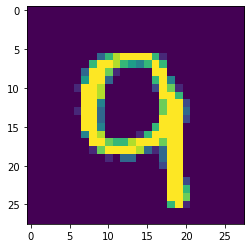

In [63]:
number = x_test[2341]
plt.imshow(number.reshape(28,28))

In [65]:
# SHAPE --> (num_images,width,height,color_channels)
np.argmax(model.predict(number.reshape(1,28,28,1)), axis=-1)

1/1 [==============================] - 0s 46ms/step


array([9])